# DPGP3 diversity analysis

The goal of this notebook is to analyze the DPGP3 data, looking at the coarse-grained two-site frequency spectrum for signatures of non-Kingman coalescence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
import helpers as h

# Data

## Diversity

In [3]:
data_dir = '../data/DPGP3/minor_allele_counts/'
chromosomes = ['2L', '2R', '3L', '3R']
files = {c : data_dir + 'Chr' + c + '.mac.txt.gz' for c in chromosomes}
chrom_lengths = {'2L':23011544,
                 '2R':21146708,
                 '3L':24543557,
                 '3R':27905053}

In [4]:
data = {c : h.loadints(files[c], chrom_lengths[c], 2) for c in chromosomes}

In [5]:
nobs = {c:data[c][:,0] for c in chromosomes}
mac = {c:data[c][:,1] for c in chromosomes}

## 4-fold degenerate sites

In [6]:
fourD_sites = pd.read_table('../data/dmel-4Dsites.txt', header=None, names=['chr', 'pos'])
fourD_sites.head()

,chr,pos
0,YHet,316
1,YHet,340
2,YHet,352
3,YHet,364
4,YHet,373


In [7]:
#Convert from one-index to zero-index
fourD_pos = {chrom : np.array(fourD_sites.pos[fourD_sites.chr == chrom] - 1) for chrom in chromosomes}

In [8]:
print('Fraction of sites that are 4-fold degenerate:')
for chrom in chromosomes:
    print('{}\t{:.3f}'.format(chrom, len(fourD_pos[chrom]) / data[chrom].shape[0]))

Fraction of sites that are 4-fold degenerate:
2L	0.028
2R	0.032
3L	0.028
3R	0.030


# Coverage and diversity

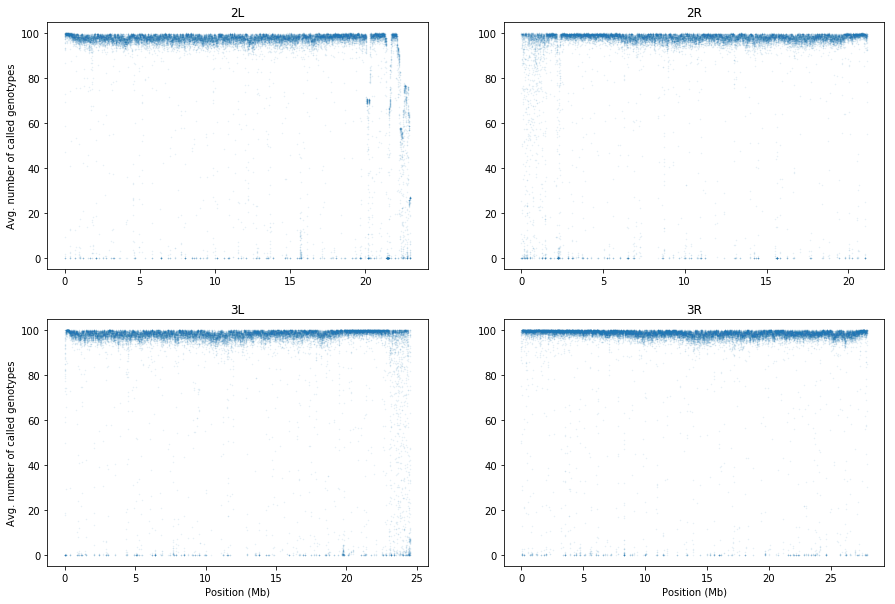

In [11]:
window_size = 1000

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = chrom_lengths[chrom] // window_size
    pos = np.arange(n_w)*window_size / 1e6
    nobs_w = np.mean(nobs[chrom][:n_w*window_size].reshape(n_w, window_size), axis=1)
                                 
    plt.subplot(2,2,i+1)
    plt.plot(pos, nobs_w, '.', ms=1, alpha=0.1)#, linestyle='steps-pre')

    plt.title(chrom)
    if i%2 == 0:
        plt.ylabel('Avg. number of called genotypes')
    if i >= 2:
        plt.xlabel('Position (Mb)')
plt.show()

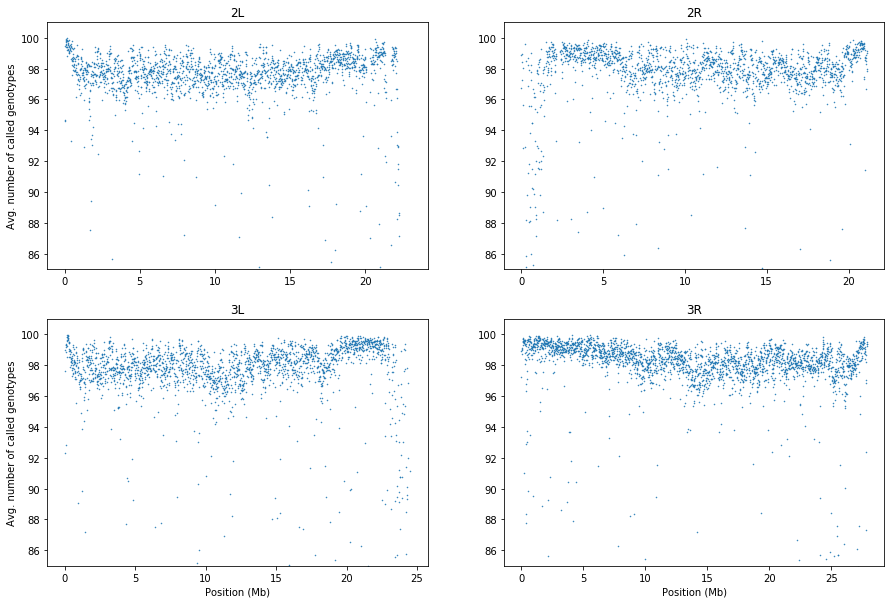

In [12]:
window_size = 10000

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = chrom_lengths[chrom] // window_size
    pos = np.arange(n_w)*window_size / 1e6
    nobs_w = np.mean(nobs[chrom][:n_w*window_size].reshape(n_w, window_size), axis=1)
                                 
    plt.subplot(2,2,i+1)
    plt.plot(pos, nobs_w, '.', ms=1, alpha=1)#, linestyle='steps-pre')
    plt.ylim([85,101])
    plt.title(chrom)
    if i%2 == 0:
        plt.ylabel('Avg. number of called genotypes')
    if i >= 2:
        plt.xlabel('Position (Mb)')
plt.show()

/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


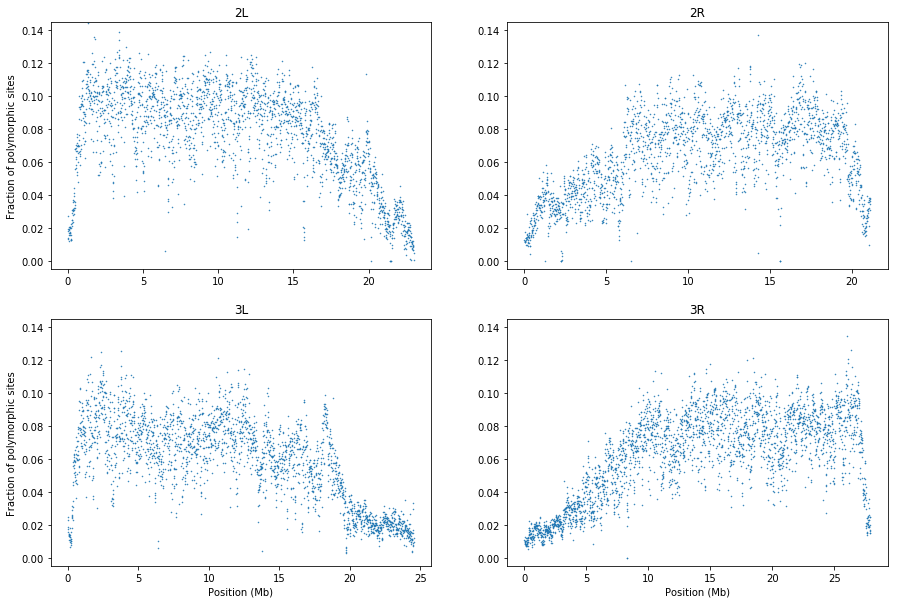

In [13]:
window_size = 10000

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = chrom_lengths[chrom] // window_size
    pos = np.arange(n_w)*window_size / 1e6

    hascov = nobs[chrom] > 0
    hascov_w = np.sum(hascov[:n_w*window_size].reshape(n_w, window_size), axis=1)

    poly = mac[chrom] > 0
    poly_w = np.sum(poly[:n_w*window_size].reshape(n_w, window_size), axis=1)
                             
    plt.subplot(2,2,i+1)
    plt.plot(pos, poly_w/hascov_w, '.', ms=1, alpha=1)#, linestyle='steps-pre')
    plt.ylim([-0.005,0.145])
    plt.title(chrom)
    if i%2 == 0:
        plt.ylabel('Fraction of polymorphic sites')
    if i >= 2:
        plt.xlabel('Position (Mb)')
plt.show()

/Users/dpr/mmc_genomics/src/helpers.py:6: RuntimeWarning: invalid value encountered in true_divide
  f = allele_counts / sample_size
/Users/dpr/mmc_genomics/src/helpers.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return 2*f*(1-f) / (1 - (1/sample_size))
/Users/dpr/mmc_genomics/src/helpers.py:7: RuntimeWarning: invalid value encountered in true_divide
  return 2*f*(1-f) / (1 - (1/sample_size))
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


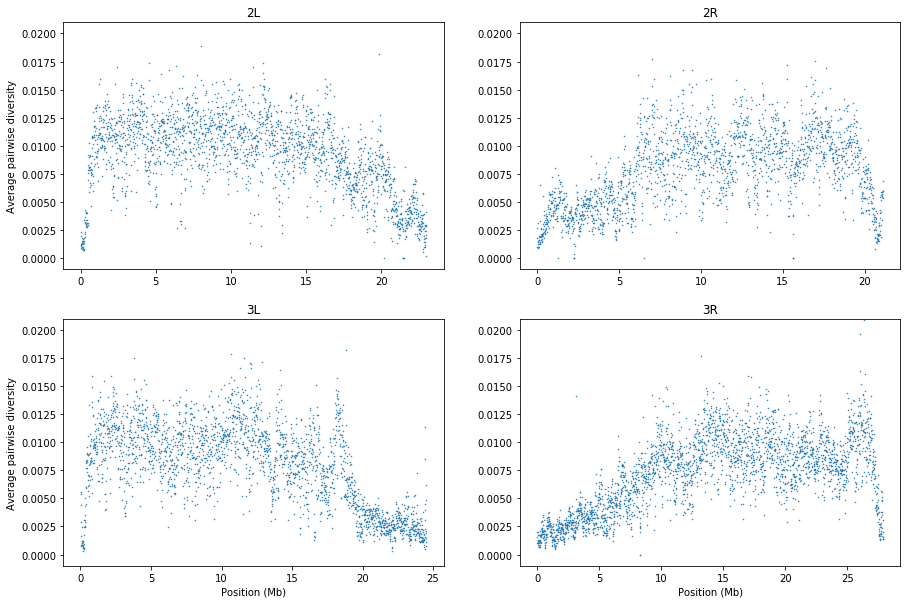

In [14]:
window_size = 10000

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = chrom_lengths[chrom] // window_size
    pos = np.arange(n_w)*window_size / 1e6
    
    hascov = nobs[chrom] > 0
    hascov_w = np.sum(hascov[:n_w*window_size].reshape(n_w, window_size), axis=1)
    
    pi = h.pairwise_diversity(mac[chrom], nobs[chrom])
    pi_w = np.nansum(pi[:n_w*window_size].reshape(n_w, window_size), axis=1)
                             
    plt.subplot(2,2,i+1)
    plt.plot(pos, pi_w/hascov_w, '.', ms=1, alpha=1)#, linestyle='steps-pre')

    plt.ylim([-0.001, 0.021])
    plt.title(chrom)
    if i%2 == 0:
        plt.ylabel('Average pairwise diversity')
    if i >= 2:
        plt.xlabel('Position (Mb)')
plt.show()

In [15]:
start = {'2L':int(1e6),
        '2R':int(6e6),
        '3L':int(1e6),
        '3R':int(10e6)}
end = {'2L':int(17e6),
        '2R':int(19e6),
        '3L':int(17e6),
        '3R':int(26e6)}

/Users/dpr/mmc_genomics/src/helpers.py:6: RuntimeWarning: invalid value encountered in true_divide
  f = allele_counts / sample_size
/Users/dpr/mmc_genomics/src/helpers.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return 2*f*(1-f) / (1 - (1/sample_size))
/Users/dpr/mmc_genomics/src/helpers.py:7: RuntimeWarning: invalid value encountered in true_divide
  return 2*f*(1-f) / (1 - (1/sample_size))
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


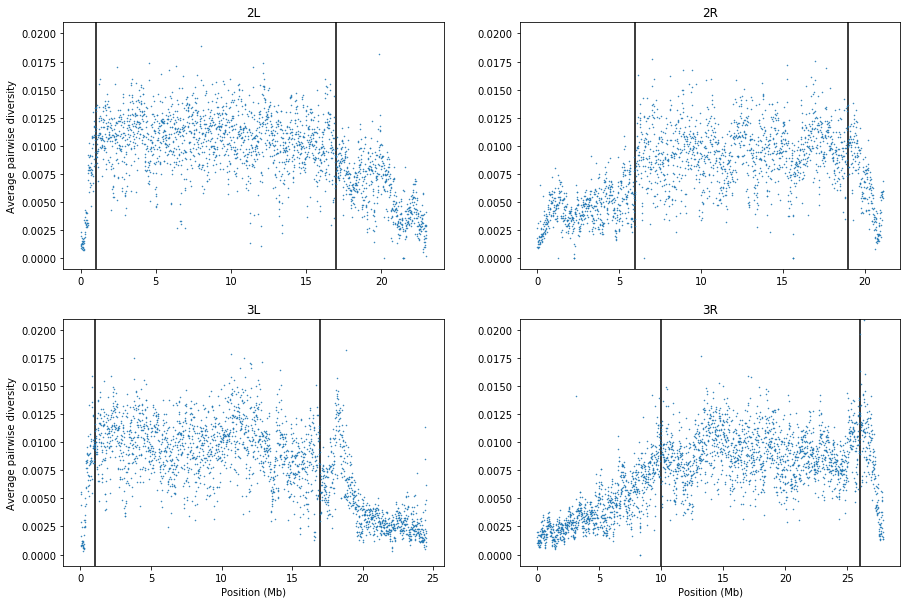

In [16]:
window_size = 10000

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = chrom_lengths[chrom] // window_size
    pos = np.arange(n_w)*window_size / 1e6
    
    hascov = nobs[chrom] > 0
    hascov_w = np.sum(hascov[:n_w*window_size].reshape(n_w, window_size), axis=1)
    
    pi = h.pairwise_diversity(mac[chrom], nobs[chrom])
    pi_w = np.nansum(pi[:n_w*window_size].reshape(n_w, window_size), axis=1)
                             
    plt.subplot(2,2,i+1)
    plt.plot(pos, pi_w/hascov_w, '.', ms=1, alpha=1)#, linestyle='steps-pre')
    plt.vlines([start[chrom]/1e6,end[chrom]/1e6], -0.001, 0.021)
    
    plt.ylim([-0.001, 0.021])

    plt.title(chrom)
    if i%2 == 0:
        plt.ylabel('Average pairwise diversity')
    if i >= 2:
        plt.xlabel('Position (Mb)')
plt.show()

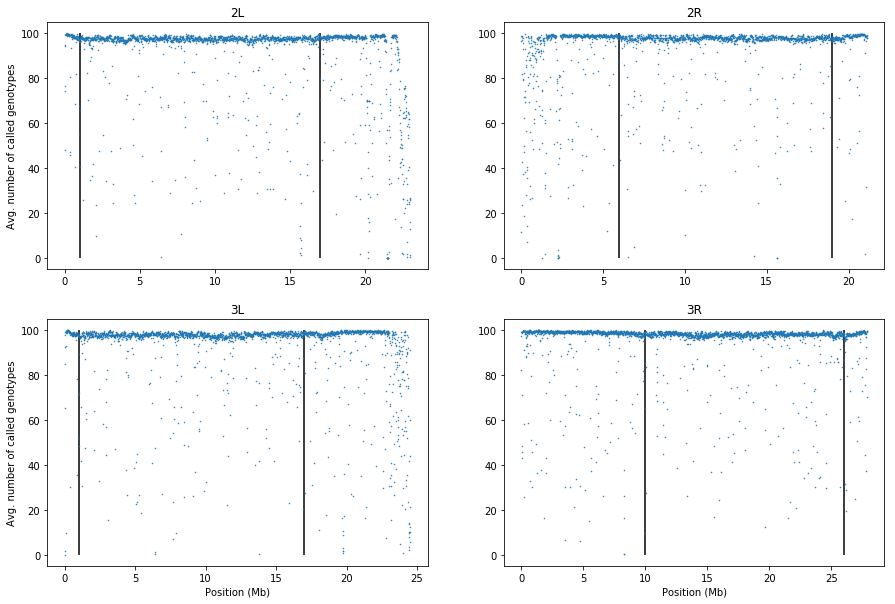

In [17]:
window_size = 10000

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = chrom_lengths[chrom] // window_size
    pos = np.arange(n_w)*window_size / 1e6
    nobs_w = np.mean(nobs[chrom][:n_w*window_size].reshape(n_w, window_size), axis=1)
                                 
    plt.subplot(2,2,i+1)
    plt.plot(pos, nobs_w, '.', ms=1, alpha=1)#, linestyle='steps-pre')
    
    plt.vlines([start[chrom]/1e6,end[chrom]/1e6], 0, 100)

    plt.title(chrom)
    if i%2 == 0:
        plt.ylabel('Avg. number of called genotypes')
    if i >= 2:
        plt.xlabel('Position (Mb)')
plt.show()

# Coverage statistics in the "central regions"

In [18]:
nobs_c = {c:nobs[c][start[c]:end[c]] for c in chromosomes}
mac_c = {c:mac[c][start[c]:end[c]] for c in chromosomes}

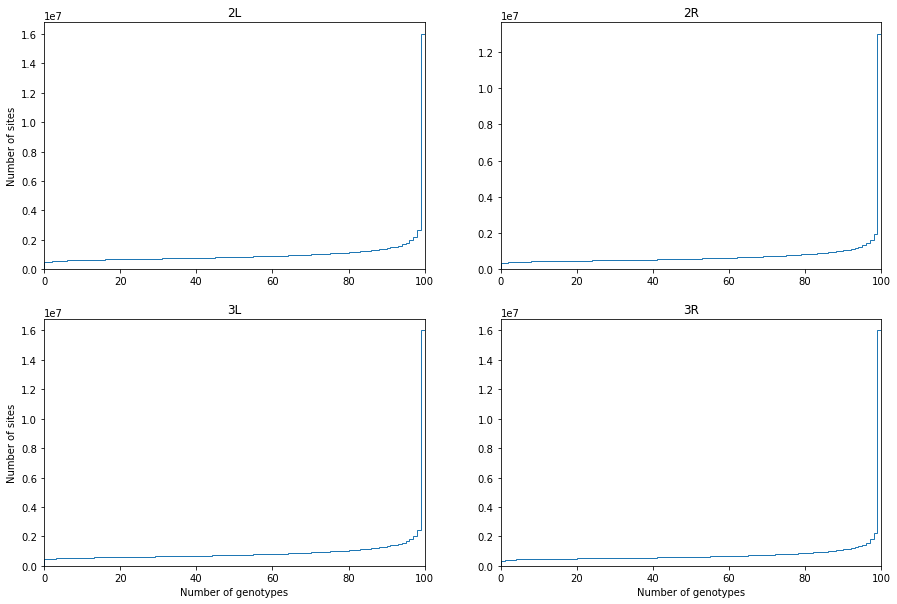

In [19]:
plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    plt.subplot(2,2,i+1)
    plt.hist(nobs_c[chrom], bins=np.arange(0,101,1), cumulative=True, histtype='step')
    plt.xlim([0,100])
    plt.title(chrom)
    if i%2 == 0:
        plt.ylabel('Number of sites')
    if i >= 2:
        plt.xlabel('Number of genotypes')
plt.show()

In [20]:
cov_cutoff = 90
print('Fraction of sites with >= 90 genotypes')
print('Chrom.\tAll\tPolymorphic')
for c in chromosomes:
    f_suf = np.mean(nobs_c[c] >= cov_cutoff)
    f_seg_suf = np.sum((nobs_c[c] >= cov_cutoff) & (mac_c[c]>0)) / np.sum(mac_c[c]>0)
    print('{}\t{:.3f}\t{:.3f}'.format(c, f_suf, f_seg_suf))

Fraction of sites with >= 90 genotypes
Chrom.	All	Polymorphic
2L	0.913	0.924
2R	0.922	0.925
3L	0.919	0.920
3R	0.933	0.936


In [21]:
sufficient_cov = {c:(nobs_c[c] >= cov_cutoff) for c in chromosomes}

In [22]:
lag_max = 5000
sc_corr = {c: np.correlate(sufficient_cov[c].astype(int), sufficient_cov[c][:-lag_max].astype(int)) / len(sufficient_cov[c] - lag_max)
           for c in chromosomes}

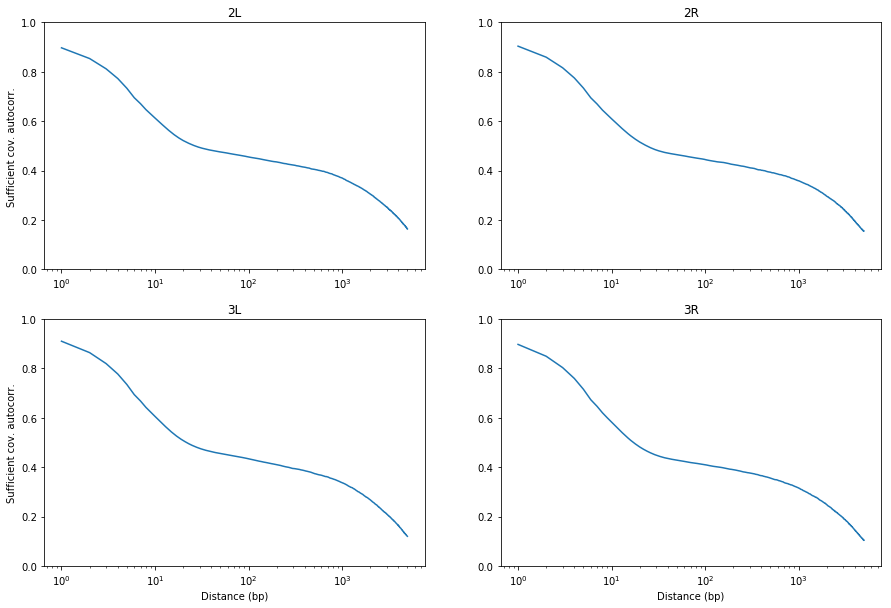

In [23]:
plt.figure(figsize=(15,10))
for i, c in enumerate(chromosomes):
    plt.subplot(2,2,i+1)
    y = sc_corr[c] - np.mean(sufficient_cov[c])**2
    plt.plot(np.arange(1,lag_max+1), y[1:]/y[0])
    plt.ylim([0,1])
    plt.xscale('log')
    plt.title(c)
    if i%2 == 0:
        plt.ylabel('Sufficient cov. autocorr.')
    if i >= 2:
        plt.xlabel('Distance (bp)')
plt.show()

It looks like there are two scales: order 10 bp and 1 Kb. The are the same for all chromosomes.

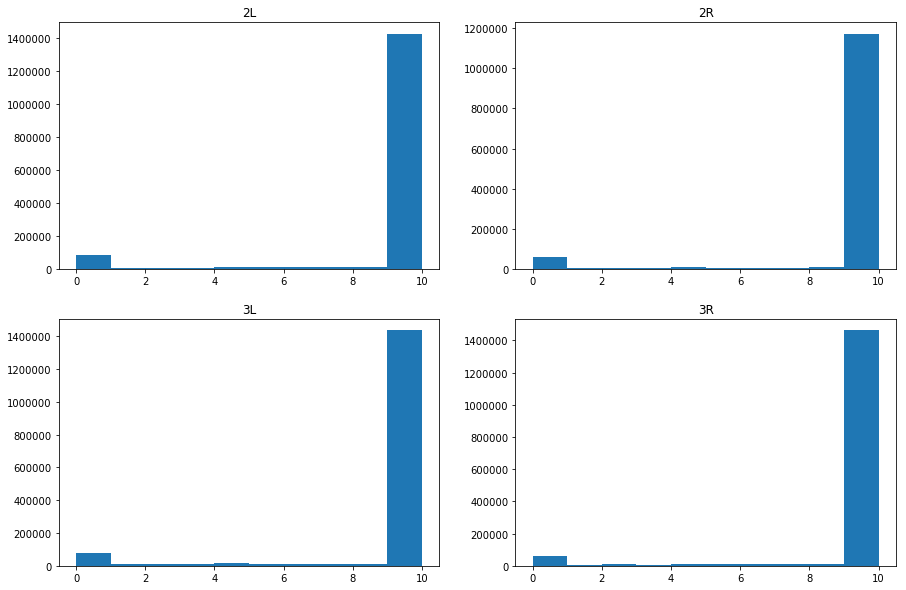

In [24]:
window_size = 10

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = (end[chrom] - start[chrom]) // window_size
    sc_w = np.sum(sufficient_cov[chrom][:n_w*window_size].reshape(n_w, window_size), axis=1)

    plt.subplot(2,2,i+1)
    plt.hist(sc_w, bins=np.arange(0,window_size+1,1))

    plt.title(chrom)
    #if i%2 == 0:
    #    plt.ylabel('Avg. number of called genotypes')
   # if i >= 2:
    #    plt.xlabel('Position (Mb)')
plt.show()

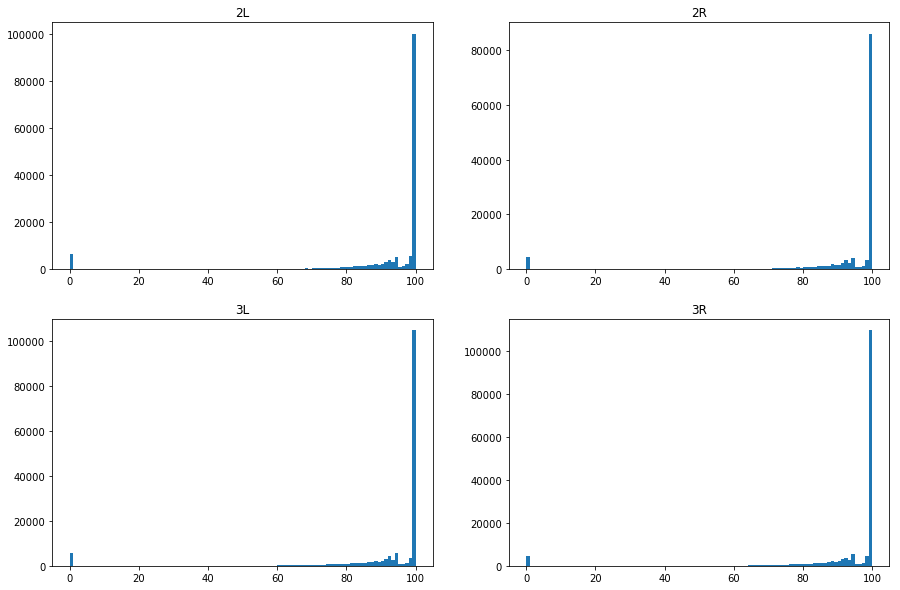

In [25]:
window_size = 100

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = (end[chrom] - start[chrom]) // window_size
    sc_w = np.sum(sufficient_cov[chrom][:n_w*window_size].reshape(n_w, window_size), axis=1)

    plt.subplot(2,2,i+1)
    plt.hist(sc_w, bins=np.arange(0,window_size+1,1))

    plt.title(chrom)
    #if i%2 == 0:
    #    plt.ylabel('Avg. number of called genotypes')
   # if i >= 2:
    #    plt.xlabel('Position (Mb)')
plt.show()

The second mode around 95 suggests that there are ~5bp elements that are being masked by the calling pipeline. This is probably contributing to the first (short) autocorrelation scale.

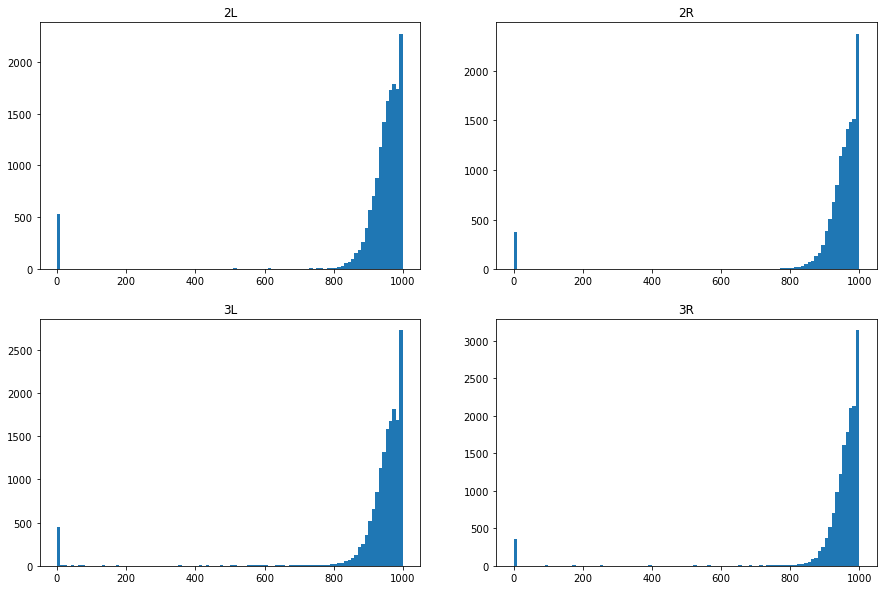

In [26]:
window_size = 1000

plt.figure(figsize=(15,10))
for i, chrom in enumerate(chromosomes):
    n_w = (end[chrom] - start[chrom]) // window_size
    sc_w = np.sum(sufficient_cov[chrom][:n_w*window_size].reshape(n_w, window_size), axis=1)

    plt.subplot(2,2,i+1)
    plt.hist(sc_w, bins=np.arange(0,window_size+1,10))

    plt.title(chrom)
    #if i%2 == 0:
    #    plt.ylabel('Avg. number of called genotypes')
   # if i >= 2:
    #    plt.xlabel('Position (Mb)')
plt.show()

We may want to mask 1 Kb windows with fewer that 800 sufficent sites, but I'm not going to for now.

# Diversity correlations

In [29]:
nobs_suf = {}
mac_suf = {}
maf = {}
pi = {}
for c in chromosomes:
    n = np.zeros_like(nobs_c[c])
    n[sufficient_cov[c]] = nobs_c[c][sufficient_cov[c]]
    nobs_suf[c] = n
    
    m = np.zeros_like(mac_c[c])
    m[sufficient_cov[c]] = mac_c[c][sufficient_cov[c]]
    mac_suf[c] = m
    
    f = m/n
    f[np.isnan(f)] = 0
    maf[c] = f
    
    p = h.pairwise_diversity(m,n)
    p[np.isnan(p)] = 0
    pi[c] = p

/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Users/dpr/mmc_genomics/src/helpers.py:6: RuntimeWarning: invalid value encountered in true_divide
  f = allele_counts / sample_size
/Users/dpr/mmc_genomics/src/helpers.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return 2*f*(1-f) / (1 - (1/sample_size))


In [30]:
for c in chromosomes:
    print('{}\t{:.4f}\t{:.3f}'.format(c,
                                      np.sum(pi[c])/np.sum(sufficient_cov[c]),
                                      np.sum(mac_suf[c]>0)/np.sum(sufficient_cov[c])))

2L	0.0101	0.088
2R	0.0091	0.076
3L	0.0092	0.070
3R	0.0086	0.075


In [31]:
sufcov4d = {}
nobs4d = {}
mac4d = {}
maf4d = {}
pi4d = {}
for c in chromosomes:
    # Adjust the positions
    pos4d = fourD_pos[c][(fourD_pos[c]>start[c]) & (fourD_pos[c]<end[c])] - start[c]
    is4d = np.zeros_like(sufficient_cov[c])
    is4d[pos4d] = True
    print(np.mean(is4d))
    
    # This holds boolean values: True for sufficient coverage and 4d
    s = np.zeros_like(sufficient_cov[c])
    s[is4d] = sufficient_cov[c][is4d]
    sufcov4d[c] = s.astype(int)
    
    n = np.zeros_like(nobs_c[c])
    n[s] = nobs_c[c][s]
    nobs4d[c] = n
    
    m = np.zeros_like(mac_c[c])
    m[s] = mac_c[c][s]
    mac4d[c] = m
    
    f = m/n
    f[np.isnan(f)] = 0
    maf4d[c] = f
    
    p = h.pairwise_diversity(m,n)
    p[np.isnan(p)] = 0
    pi4d[c] = p
#    n = np.zeros_like(nobs_suf[c])
#    n[is4d] = nobs_suf[c][is4d]
#    nobs4d[c] = n
#    sufcov4d[c] = n>0
    
#    m = np.zeros_like(mac_suf[c])
#    m[is4d] = mac_suf[c][is4d]
#    mac4d[c] = m
    
#    f = m/n
#    f[np.isnan(f)] = 0
#    maf4d[c] = f
    
#    p = h.pairwise_diversity(m,n)
#    p[np.isnan(p)] = 0
#    pi4d[c] = p

0.03022025


/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/Users/dpr/mmc_genomics/src/helpers.py:6: RuntimeWarning: invalid value encountered in true_divide
  f = allele_counts / sample_size
/Users/dpr/mmc_genomics/src/helpers.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return 2*f*(1-f) / (1 - (1/sample_size))


0.0338060769231
0.0304045625
0.03126825


In [32]:
for c in chromosomes:
    print('{}\t{:.4f}\t{:.3f}'.format(c,
                                      np.sum(pi4d[c])/np.sum(sufcov4d[c]),
                                      np.sum(mac4d[c]>0)/np.sum(sufcov4d[c])))

2L	0.0229	0.152
2R	0.0204	0.132
3L	0.0199	0.122
3R	0.0182	0.126


In [33]:
lag_max = 10000
comparisons4d = {}
for c in chromosomes:
    comparisons4d[c] = np.correlate(sufcov4d[c], sufcov4d[c][:-lag_max])

In [34]:
print(comparisons4d)

{'3R': array([493067,      0,      0, ...,  21455,  23338,  23115]), '2R': array([429744,      0,      0, ...,  20095,  21735,  18376]), '2L': array([467785,      0,      0, ...,  20278,  22231,  22040]), '3L': array([471106,      0,      0, ...,  19843,  21111,  21363])}


In [35]:
pi_mean = {c: np.sum(pi4d[c])/np.sum(sufcov4d[c])
           for c in chromosomes}
print(pi_mean)

{'3R': 0.018239839104114676, '2R': 0.020445331568658166, '2L': 0.022934785130634457, '3L': 0.019899829309177618}


In [36]:
pi_corr4d = {c: np.correlate(pi4d[c], pi4d[c][:-lag_max])
           for c in chromosomes}

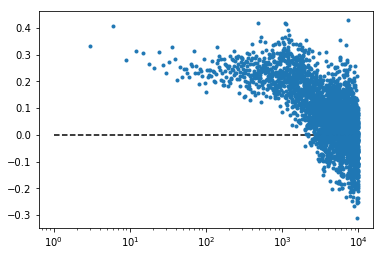

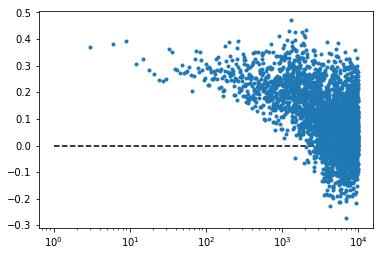

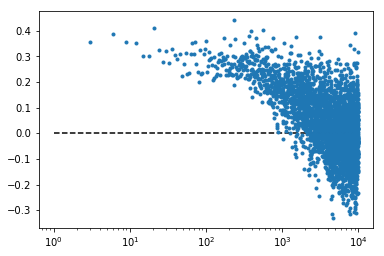

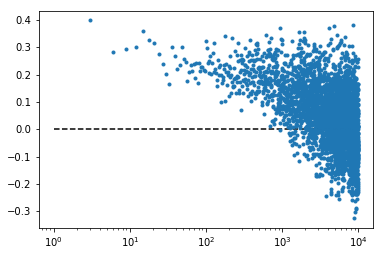

In [37]:
for c in chromosomes:
    plt.semilogx(np.arange(3,lag_max,3), (pi_corr4d[c][3::3]/comparisons4d[c][3::3] /pi_mean[c]**2) - 1, '.')
    plt.hlines(0, 1, lag_max, linestyle='dashed')
    plt.show()

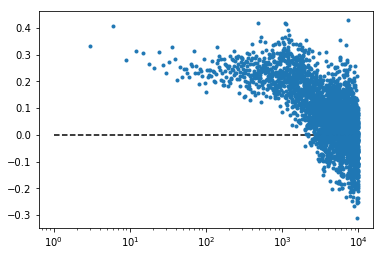

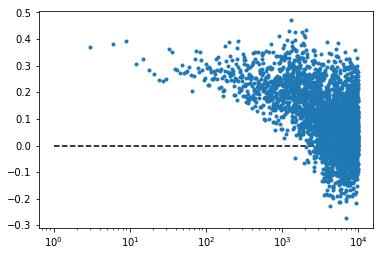

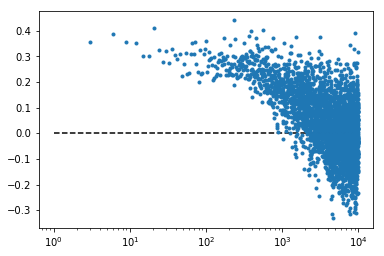

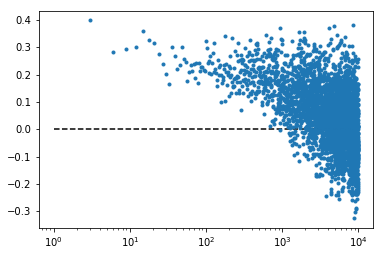

In [38]:
for c in chromosomes:
    plt.semilogx(np.arange(3,lag_max,3), (pi_corr4d[c][3::3]/comparisons4d[c][3::3] /pi_mean[c]**2) - 1, '.')
    plt.hlines(0, 1, lag_max, linestyle='dashed')
    plt.show()

In [27]:
freq_cutoff = 0.05
hi_freq4d = {c: ((mac4d[c]>0) & (maf4d[c] > freq_cutoff)).astype(int) for c in chromosomes}
lo_freq4d = {c: ((mac4d[c]>0) & (maf4d[c] <= freq_cutoff)).astype(int) for c in chromosomes}

NameError: name 'mac4d' is not defined

In [28]:
f_hi4d = {c: np.sum(hi_freq4d[c]) / np.sum(sufcov4d[c]) for c in chromosomes}
f_lo4d = {c: np.sum(lo_freq4d[c]) / np.sum(sufcov4d[c]) for c in chromosomes}
print(f_lo4d, f_hi4d)

NameError: name 'hi_freq4d' is not defined

In [38]:
hilo_corr4d = {c: np.correlate(hi_freq4d[c], lo_freq4d[c][:-lag_max]) for c in chromosomes}

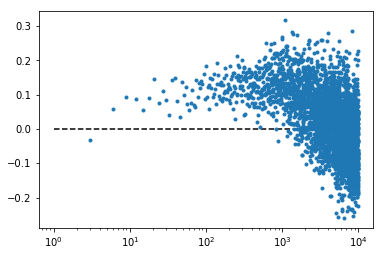

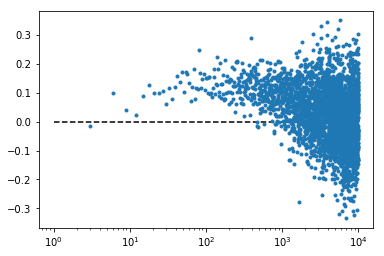

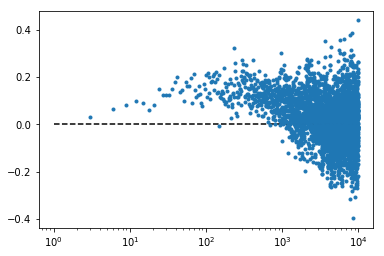

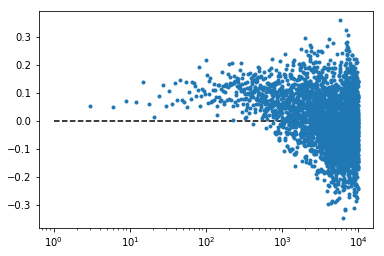

In [39]:
for c in chromosomes:
    plt.semilogx(np.arange(3,lag_max,3), hilo_corr4d[c][3::3]/comparisons4d[c][3::3]/(f_lo4d[c]*f_hi4d[c]) - 1, '.')
    plt.hlines(0, 1, lag_max, linestyle='dashed')
    plt.show()

# Comparison w/ `fastNeutrino`

In [44]:
def get_data(file_list, r_list, n_samples):
    data = h.import_msprime_corr(file_list, n_samples)
    pi, sfs, jsfs, pi_corr, lolo_corr, lohi_corr, hihi_corr = data
    return r_list, sfs/pi[:,None], pi, pi_corr, lohi_corr

In [45]:
r_list = np.insert(np.logspace(-1,3,13), 0, 0.0)
n_samples = 100
file_list_fastNeutrino = ['../simulations/msprime/jsfs_fastNeutrino_n-{}_Chr{}_3EpochConstConst_r-{}.txt'.format(n_samples, ch, r)
                          for ch in chromosomes for r in r_list]
data_fastNeutrino = get_data(file_list_fastNeutrino, r_list, n_samples)

In [ ]:
def plot_row(axes, r_list, sfs, pi, pic, lhc, cutoffs, n_samples=100, x_lohi='d'):
    '''
    Take a set of axes and plot the various data on them
    '''
    # The axis limits
    d_lim = [8e-2, (1/8)*1e3]
    pic_lim = [-0.01, 0.31]
    lhc_lim = [-0.11,0.11]
    #lhc_lim = [-0.021,0.021]
    sfs_lim = [2e-3, 2e1]

    step = len(r_list)
    n_steps = sfs.shape[0]//step
    
    for i in range(n_steps):
        # Plot SFS
        y0 = np.mean(sfs[i*step:(i+1)*step], axis=0)
        x0 = np.arange(1, len(y0) + 1)        
        axes[0].loglog(x0, y0)
        axes[0].loglog(x0, 1/x0 + 1/(n_samples-x0), ':', color='0.5')
        axes[0].set_ylim(sfs_lim)
        
        d = r_list*pi[i*step:(i+1)*step]/2
        
        # Plot Pi-correlation
        x1 = d
        y1 = pic[i*step:(i+1)*step]
        axes[1].semilogx(x1, y1, )
        axes[1].hlines(0, 1e-1, 1e2, linestyle='dashed')
        axes[1].set_ylim(pic_lim)
        axes[1].set_xlim(d_lim)
        
        axes[1].semilogx(d_kingman, pic_kingman, ':', color='0.5')
        
        # Plot LoHi-Correlations for different cutoffs
        for j, cutoff in enumerate(cutoffs):
            ax = axes[2 + j]
            y = lhc[i*step:(i+1)*step, cutoff-1]
            if x_lohi == 'd':
                x = d
                ax.semilogx(x,y)
                ax.semilogx(d_kingman, lhc_kingman[:,cutoff-1], ':', color='0.5')
                ax.hlines(0, d_lim[0], d_lim[1])
                ax.set_xlim(d_lim)
            elif x_lohi == 'pic':
                x = y1
                ax.plot(x,y)
                ax.plot(pic_kingman, lhc_kingman[:,cutoff-1], ':', color='0.5')
                ax.hlines(0, pic_lim[0], pic_lim[1])
                ax.set_xlim(pic_lim)
            ax.set_ylim(lhc_lim)
            
    return axes

In [49]:
print(data_fastNeutrino)

(array([  0.00000000e+00,   1.00000000e-01,   2.15443469e-01,
         4.64158883e-01,   1.00000000e+00,   2.15443469e+00,
         4.64158883e+00,   1.00000000e+01,   2.15443469e+01,
         4.64158883e+01,   1.00000000e+02,   2.15443469e+02,
         4.64158883e+02,   1.00000000e+03]), array([[ 1.98795721,  0.80831512,  0.47010104, ...,  0.03631743,
         0.03560822,  0.01772987],
       [ 1.9905604 ,  0.80830832,  0.46903292, ...,  0.03521406,
         0.03500142,  0.0172694 ],
       [ 1.98690771,  0.80872751,  0.46830859, ...,  0.03541039,
         0.03606305,  0.01762244],
       ..., 
       [ 2.16600503,  0.88739871,  0.51475753, ...,  0.03589803,
         0.03513346,  0.01759419],
       [ 2.1674389 ,  0.88615613,  0.5156273 , ...,  0.03535071,
         0.03551783,  0.01737179],
       [ 2.16590028,  0.88705542,  0.51474713, ...,  0.03527999,
         0.03528614,  0.01743906]]), array([ 0.75738088,  0.75757495,  0.7579672 ,  0.75655463,  0.75682158,
        0.75620637,  0.

In [46]:
# FIXME: compare with literature
mu_dmel = 3e-9
r_dmel = 2e-8
pi_dmel = np.mean([pi_mean[chrom] for chrom in chromosomes])
d_crit = 2*mu_dmel / (r_dmel*pi_dmel)
print(d_crit)

14.7203528363


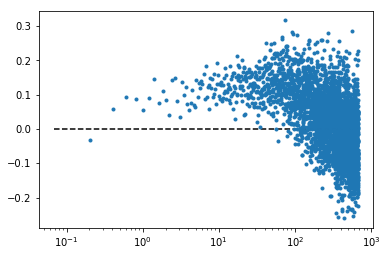

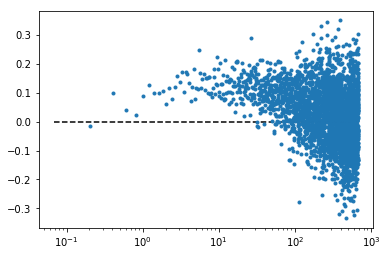

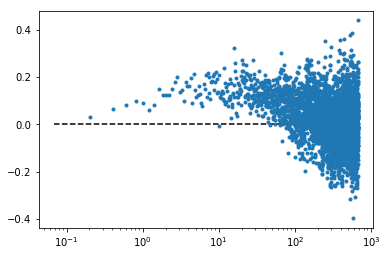

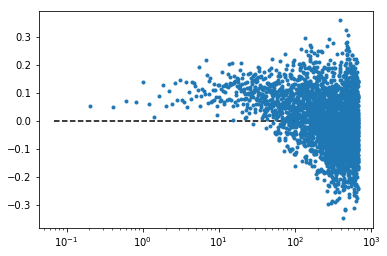

In [48]:
for c in chromosomes:
    plt.semilogx(np.arange(3,lag_max,3)/d_crit, hilo_corr4d[c][3::3]/comparisons4d[c][3::3]/(f_lo4d[c]*f_hi4d[c]) - 1, '.')
    plt.hlines(0, 1/d_crit, lag_max/d_crit, linestyle='dashed')
    plt.show()